In [1]:
# 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,223 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

### 필수과제 
- melt 이용
- 날씨데이터( 기상청 데이터 ) 다운로드 받아서 원하는 지역으로 설정 
- 날씨데이터는 인덱스 기준이 시계열 데이터
- 시계열 데이터를 인덱스를 기준으로해서 병합을 해야함
- 주제는 자유이고 기온이나, 강우량 등 해당 날씨 데이터와 요인이 있을 것 같은 사회적인 변수 데이터나 경제 데이터나 소비자데이터 등을 같이 다운로드 받아서 시계열을 기준으로 하나의 데이터 컬럼을 만들기
- 공공데이터, 통계청kosis 데이터 등에서 다운로드 받기
- Ex) 날씨와 경제변수가 상관이 있을까?
- 두 개의 데이터를 구해서 시계열을 기준으로 깔끔하게 병합하고 데이터 분석에 필요한 전처리 후에 시각화를 진행해서 실제 본인이 가설을 세운 것이 시각적으로 봤을 때 어떻게 나오는지 확인해 주시고 주석처리하기
- 데이터 범위는 1~2년 최소 / 일자별데이터로 하기 / 일자별이 없으면 월별도 가능

### 사용할 데이터
- 타겟 지역: 서울
- 날씨 데이터 - 기상자료개방포털
- 날씨와 관련된 사회적인 변수 데이터, 경제 데이터, 소비자 데이터
- 에너지 소비량 (월별) - 서울시 열린 데이터 광장

#### 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filepath = '/content/drive/MyDrive/Colab Notebooks/BDAA 학회/과제/에너지사용량데이터 통계 요약정보.csv'
energy_raw = pd.read_csv(filepath, encoding='cp949')

In [4]:
energy_raw

,년도,월,회원타입,건수,현년 전기사용량,전년 전기사용량,전전년 전기사용량,토탈 전기 증감량,토탈 전기탄소 증감량,현년 가스사용량,...,전년 수도사용량,전전년 수도사용량,토탈 수도 증감량,토탈 수도탄소 증감량,현년 지역난방 사용량,전년 지역난방 사용량,전전년 지역난방 사용량,토탈 지역난방 증감량,토탈 지역난방탄소 증감량,등록일
0,2022,10,학교,6682,101766144.0,95515842.0,83096078.0,12460184.0,5283118.016,2339615.0,...,1.719033e+06,1.596895e+06,78376.000,26020.83200,5750.033,4945.284,5395.282,579.75,105.728538,2023-01-01 04:12:29.0
1,2022,10,종교단체,809,5295147.0,5055056.0,4521801.0,506718.5,214848.644,153064.0,...,3.835800e+04,3.843200e+04,14959.000,4966.38800,0.000,0.000,0.000,0.00,0.000000,2023-01-01 04:12:29.0
2,2022,10,소상공인,48818,83299730.0,84844472.0,78308101.0,1723443.5,730740.044,1879896.0,...,1.538695e+06,1.529646e+06,62129.300,20626.92760,87814.010,423.040,461.040,87371.97,347455.409676,2023-01-01 04:12:29.0
3,2022,10,기업,19001,559014202.0,567738130.0,532575345.0,8857464.5,3755564.948,16932243.0,...,4.593510e+06,4.447463e+06,347011.800,115207.91760,0.000,0.000,0.000,0.00,0.000000,2023-01-01 04:12:29.0
4,2022,10,공동주택관리소,3629,458715437.0,470349998.0,459147687.0,-6033405.5,-2558163.932,2663313.0,...,2.179859e+07,2.204621e+07,-1448465.450,-480890.52940,0.000,0.000,0.000,0.00,0.000000,2023-01-01 04:12:29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,2009,10,공공기관,563,16216821.0,14813807.0,15376858.0,1005352.5,426269.460,298824.0,...,2.923984e+05,2.952240e+05,34374.700,11412.40040,NaN,NaN,NaN,NaN,NaN,2015-06-08 15:07:34.0
1013,2009,10,개인,43711,4976029.0,4973414.0,4982141.0,-80786.0,-34253.264,956426.0,...,5.757149e+05,5.505782e+05,4139.610,1374.35052,0.000,0.000,0.000,0.00,0.000000,2015-06-08 15:07:34.0
1014,2009,9,기업,1,259.0,275.0,297.0,-27.0,-11.448,13.0,...,3.600000e+01,5.700000e+01,-8.300,-2.75560,NaN,NaN,NaN,NaN,NaN,2015-06-08 15:08:20.0
1015,2009,9,공동주택관리소,252,50493183.0,49761424.0,48591204.0,752133.5,318904.604,198961.0,...,1.968248e+06,1.836093e+06,119492.950,39671.65940,NaN,NaN,NaN,NaN,NaN,2015-06-08 15:08:20.0


In [5]:
filepath = '/content/drive/MyDrive/Colab Notebooks/BDAA 학회/과제/OBS_ASOS_MNH_20230210153710.csv'
weather_raw = pd.read_csv(filepath, encoding = 'cp949')

In [6]:
weather_raw

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),평균상대습도(%),월합강수량(00~24h만)(mm),일최다강수량(mm),평균풍속(m/s),최대풍속(m/s),최심적설(cm)
0,108,서울,2009-09,21.8,26.3,17.7,29.9,14.4,64,64.5,30.5,1.8,6.5,NaN
1,108,서울,2009-10,16.0,20.9,11.7,26.4,6.2,62,66.9,19.5,2.1,9.7,NaN
2,108,서울,2009-11,6.9,10.4,3.7,21.8,-4.3,64,52.4,34.0,2.5,6.8,NaN
3,108,서울,2009-12,-1.0,2.5,-4.2,10.1,-12.9,60,21.5,11.5,2.5,8.3,3.0
4,108,서울,2010-01,-4.5,-0.7,-8.1,8.4,-15.3,65,29.3,14.2,2.3,6.9,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,108,서울,2022-06,23.3,27.5,19.8,32.7,14.9,73,393.8,176.2,2.5,9.9,NaN
154,108,서울,2022-07,27.3,31.0,24.2,36.1,20.8,77,252.3,114.5,2.1,5.6,NaN
155,108,서울,2022-08,25.7,28.9,23.1,32.9,16.1,80,564.8,129.6,2.3,8.6,NaN
156,108,서울,2022-09,22.4,27.2,18.2,32.5,12.3,68,201.5,120.0,2.4,8.0,NaN


#### energy 데이터 전처리

In [7]:
energy_raw.columns # 필요한 컬럼만 추출하기 위해 정확한 컬럼명 확인

Index(['년도', '월', '회원타입', '건수', '현년 전기사용량', '전년 전기사용량', '전전년 전기사용량',
       '토탈 전기 증감량', '토탈 전기탄소 증감량', '현년 가스사용량', '전년 가스사용량', '전전년 가스사용량',
       '토탈 가스 증감량', '토탈 가스탄소 증감량', '현년 수도사용량', '전년 수도사용량', '전전년 수도사용량',
       '토탈 수도 증감량', '토탈 수도탄소 증감량', '현년 지역난방 사용량', '전년 지역난방 사용량',
       '전전년 지역난방 사용량', '토탈 지역난방 증감량', '토탈 지역난방탄소 증감량', '등록일'],
      dtype='object')

In [8]:
# 필요한 컬럼만 추출
energy_col = energy_raw[['년도', '월', '회원타입', '현년 전기사용량', '토탈 전기 증감량', '현년 가스사용량', '토탈 가스 증감량', '현년 수도사용량', '토탈 수도 증감량', '현년 지역난방 사용량', '토탈 지역난방 증감량']]
energy_col

,년도,월,회원타입,현년 전기사용량,토탈 전기 증감량,현년 가스사용량,토탈 가스 증감량,현년 수도사용량,토탈 수도 증감량,현년 지역난방 사용량,토탈 지역난방 증감량
0,2022,10,학교,101766144.0,12460184.0,2339615.0,346445.5,1736340.20,78376.000,5750.033,579.75
1,2022,10,종교단체,5295147.0,506718.5,153064.0,5907.5,53354.00,14959.000,0.000,0.00
2,2022,10,소상공인,83299730.0,1723443.5,1879896.0,101703.0,1596299.80,62129.300,87814.010,87371.97
3,2022,10,기업,559014202.0,8857464.5,16932243.0,-176422.0,4867498.60,347011.800,0.000,0.00
4,2022,10,공동주택관리소,458715437.0,-6033405.5,2663313.0,-83992.5,20473933.10,-1448465.450,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1012,2009,10,공공기관,16216821.0,1005352.5,298824.0,15192.0,335667.40,34374.700,NaN,NaN
1013,2009,10,개인,4976029.0,-80786.0,956426.0,-271125.5,607671.10,4139.610,0.000,0.00
1014,2009,9,기업,259.0,-27.0,13.0,3.0,38.20,-8.300,NaN,NaN
1015,2009,9,공동주택관리소,50493183.0,752133.5,198961.0,-497.0,2070903.60,119492.950,NaN,NaN


In [9]:
# melt함수를 이용한 필요한 컬럼 추출
energy_melt = pd.melt(energy_raw, id_vars = ['년도', '월', '회원타입', '현년 전기사용량', '토탈 전기 증감량', '현년 가스사용량', '토탈 가스 증감량', '현년 수도사용량', '토탈 수도 증감량', '현년 지역난방 사용량', '토탈 지역난방 증감량'])
energy_col1 = energy_melt.drop_duplicates(['년도', '월', '회원타입']).drop(['variable', 'value'], axis = 1)
energy_col1

,년도,월,회원타입,현년 전기사용량,토탈 전기 증감량,현년 가스사용량,토탈 가스 증감량,현년 수도사용량,토탈 수도 증감량,현년 지역난방 사용량,토탈 지역난방 증감량
0,2022,10,학교,101766144.0,12460184.0,2339615.0,346445.5,1736340.20,78376.000,5750.033,579.75
1,2022,10,종교단체,5295147.0,506718.5,153064.0,5907.5,53354.00,14959.000,0.000,0.00
2,2022,10,소상공인,83299730.0,1723443.5,1879896.0,101703.0,1596299.80,62129.300,87814.010,87371.97
3,2022,10,기업,559014202.0,8857464.5,16932243.0,-176422.0,4867498.60,347011.800,0.000,0.00
4,2022,10,공동주택관리소,458715437.0,-6033405.5,2663313.0,-83992.5,20473933.10,-1448465.450,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1012,2009,10,공공기관,16216821.0,1005352.5,298824.0,15192.0,335667.40,34374.700,NaN,NaN
1013,2009,10,개인,4976029.0,-80786.0,956426.0,-271125.5,607671.10,4139.610,0.000,0.00
1014,2009,9,기업,259.0,-27.0,13.0,3.0,38.20,-8.300,NaN,NaN
1015,2009,9,공동주택관리소,50493183.0,752133.5,198961.0,-497.0,2070903.60,119492.950,NaN,NaN


In [10]:
energy_col.equals(energy_col1) # 다른 전처리 과정을 거쳐도 두 데이터프레임은 같음

True

In [11]:
energy_idx = [i for i in range(energy_col.shape[0]-1, -1, -1)] # 리스트 내포를 이용하여 energy의 인덱스 역순으로하는 리스트 생성
energy_new = pd.DataFrame(energy_col, index = energy_idx)  # 년도 월을 오름차순으로 재배열
energy_new

,년도,월,회원타입,현년 전기사용량,토탈 전기 증감량,현년 가스사용량,토탈 가스 증감량,현년 수도사용량,토탈 수도 증감량,현년 지역난방 사용량,토탈 지역난방 증감량
1016,2009,9,개인,3408312.0,32295.5,476425.0,-172482.0,422157.68,12866.135,0.000,0.00
1015,2009,9,공동주택관리소,50493183.0,752133.5,198961.0,-497.0,2070903.60,119492.950,NaN,NaN
1014,2009,9,기업,259.0,-27.0,13.0,3.0,38.20,-8.300,NaN,NaN
1013,2009,10,개인,4976029.0,-80786.0,956426.0,-271125.5,607671.10,4139.610,0.000,0.00
1012,2009,10,공공기관,16216821.0,1005352.5,298824.0,15192.0,335667.40,34374.700,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4,2022,10,공동주택관리소,458715437.0,-6033405.5,2663313.0,-83992.5,20473933.10,-1448465.450,0.000,0.00
3,2022,10,기업,559014202.0,8857464.5,16932243.0,-176422.0,4867498.60,347011.800,0.000,0.00
2,2022,10,소상공인,83299730.0,1723443.5,1879896.0,101703.0,1596299.80,62129.300,87814.010,87371.97
1,2022,10,종교단체,5295147.0,506718.5,153064.0,5907.5,53354.00,14959.000,0.000,0.00


In [12]:
energy_new['년도'] = energy_new['년도'].astype(str)
energy_new['월'] = energy_new['월'].astype(str) # 년도와 월 컬럼을 합쳐서 날짜 컬럼을 만들어야 하는데 단순히 합치만 int형식이므로 문자형으로 변환
energy_new.insert(0, '날짜', energy_new['년도'] + '-' + energy_new['월']) # datetime 형식으로 바꾸기 위해 hyphen을 넣어 두개의 컬럼을 합침
energy_new.head()

,날짜,년도,월,회원타입,현년 전기사용량,토탈 전기 증감량,현년 가스사용량,토탈 가스 증감량,현년 수도사용량,토탈 수도 증감량,현년 지역난방 사용량,토탈 지역난방 증감량
1016,2009-9,2009,9,개인,3408312.0,32295.5,476425.0,-172482.0,422157.68,12866.135,0.0,0.0
1015,2009-9,2009,9,공동주택관리소,50493183.0,752133.5,198961.0,-497.0,2070903.60,119492.950,NaN,NaN
1014,2009-9,2009,9,기업,259.0,-27.0,13.0,3.0,38.20,-8.300,NaN,NaN
1013,2009-10,2009,10,개인,4976029.0,-80786.0,956426.0,-271125.5,607671.10,4139.610,0.0,0.0
1012,2009-10,2009,10,공공기관,16216821.0,1005352.5,298824.0,15192.0,335667.40,34374.700,NaN,NaN


In [13]:
print(energy_new['날짜'].dtype) # 합친 컬럼의 형식이 object이므로 datetime으로 변경해주어야 함

object


In [14]:
energy_new['날짜'] = pd.to_datetime(energy_new['날짜']) # datetime 형식으로 변경
print(energy_new['날짜'].dtype) # datetime 형식으로 변경됨

datetime64[ns]


In [15]:
energy_new['날짜'] = energy_new['날짜'].dt.strftime('%Y-%m')  # 월별 데이터이기 때문에 년도와 월까지만 표시

In [16]:
energy_new = energy_new.drop(['년도', '월'], axis = 1) # 날짜 컬럼으로 합쳐졌기 때문에 필요없는 년도, 월 컬럼을 삭제

In [17]:
energy_final = energy_new.set_index('날짜') # 인덱스를 시계열을 기준으로 설정하고 분석할 데이터 형태 완성
energy_final.fillna(0, inplace = True) # 결측치를 0으로 채우기
energy_final

,회원타입,현년 전기사용량,토탈 전기 증감량,현년 가스사용량,토탈 가스 증감량,현년 수도사용량,토탈 수도 증감량,현년 지역난방 사용량,토탈 지역난방 증감량
날짜,,,,,,,,,
2009-09,개인,3408312.0,32295.5,476425.0,-172482.0,422157.68,12866.135,0.000,0.00
2009-09,공동주택관리소,50493183.0,752133.5,198961.0,-497.0,2070903.60,119492.950,0.000,0.00
2009-09,기업,259.0,-27.0,13.0,3.0,38.20,-8.300,0.000,0.00
2009-10,개인,4976029.0,-80786.0,956426.0,-271125.5,607671.10,4139.610,0.000,0.00
2009-10,공공기관,16216821.0,1005352.5,298824.0,15192.0,335667.40,34374.700,0.000,0.00
...,...,...,...,...,...,...,...,...,...
2022-10,공동주택관리소,458715437.0,-6033405.5,2663313.0,-83992.5,20473933.10,-1448465.450,0.000,0.00
2022-10,기업,559014202.0,8857464.5,16932243.0,-176422.0,4867498.60,347011.800,0.000,0.00
2022-10,소상공인,83299730.0,1723443.5,1879896.0,101703.0,1596299.80,62129.300,87814.010,87371.97


- 분석할 회원타입 선정

In [18]:
energy_raw.query("년도 == 2022 and 월 == 10")[['회원타입', '건수']] # 마지막 집계 기준 건수가 큰 개인, 소상공인, 기업 그리고 예외로 공공기관에 대해 분석

,회원타입,건수
0,학교,6682
1,종교단체,809
2,소상공인,48818
3,기업,19001
4,공동주택관리소,3629
5,공공기관,2365
6,개인,1183941


In [19]:
# 개인의 에너지 사용량
energy_individual = energy_final[energy_final['회원타입'] == '개인'].drop('회원타입', axis = 1)
energy_individual

,현년 전기사용량,토탈 전기 증감량,현년 가스사용량,토탈 가스 증감량,현년 수도사용량,토탈 수도 증감량,현년 지역난방 사용량,토탈 지역난방 증감량
날짜,,,,,,,,
2009-09,3408312.0,32295.5,476425.0,-172482.0,4.221577e+05,1.286614e+04,0.000,0.0000
2009-10,4976029.0,-80786.0,956426.0,-271125.5,6.076711e+05,4.139610e+03,0.000,0.0000
2009-11,6596224.0,43535.0,2405251.0,-260864.0,7.079629e+05,-1.876719e+04,0.000,0.0000
2009-12,7136646.0,67140.0,4754366.0,-568457.5,7.332474e+05,-1.823869e+03,0.000,0.0000
2010-01,22227560.0,393628.0,7892660.0,500986.5,1.867839e+06,3.284464e+04,0.000,0.0000
...,...,...,...,...,...,...,...,...
2022-06,254486733.0,-12585044.0,15468022.0,-3194321.5,1.508746e+07,-7.948256e+05,838539.990,-22537.7195
2022-07,336383318.0,21325161.0,10701998.0,-481019.0,1.490720e+07,-1.530383e+06,50033.827,-378027.0810
2022-08,382965547.0,1299558.5,8718677.0,-1529052.0,1.555593e+07,-8.288351e+05,3278812.728,-4155.5520


In [20]:
# 소상공인, 기업, 공공기관
energy_sbuis = energy_final[energy_final['회원타입'] == '소상공인'].drop('회원타입', axis = 1)
energy_enterprise = energy_final[energy_final['회원타입'] == '기업'].drop('회원타입', axis = 1)
energy_public = energy_final[energy_final['회원타입'] == '공공기관'].drop('회원타입', axis = 1)

#### weather 데이터 전처리

In [21]:
weather_raw.head()

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),평균상대습도(%),월합강수량(00~24h만)(mm),일최다강수량(mm),평균풍속(m/s),최대풍속(m/s),최심적설(cm)
0,108,서울,2009-09,21.8,26.3,17.7,29.9,14.4,64,64.5,30.5,1.8,6.5,NaN
1,108,서울,2009-10,16.0,20.9,11.7,26.4,6.2,62,66.9,19.5,2.1,9.7,NaN
2,108,서울,2009-11,6.9,10.4,3.7,21.8,-4.3,64,52.4,34.0,2.5,6.8,NaN
3,108,서울,2009-12,-1.0,2.5,-4.2,10.1,-12.9,60,21.5,11.5,2.5,8.3,3.0
4,108,서울,2010-01,-4.5,-0.7,-8.1,8.4,-15.3,65,29.3,14.2,2.3,6.9,28.5


In [22]:
weather_raw.columns = weather_raw.columns.str.split('(').str.get(0) # 컬럼명에서 단위 제거
weather_raw.rename(columns = {'일시' : '날짜'}, inplace = True)
weather_raw.head()

,지점,지점명,날짜,평균기온,평균최고기온,평균최저기온,최고기온,최저기온,평균상대습도,월합강수량,일최다강수량,평균풍속,최대풍속,최심적설
0,108,서울,2009-09,21.8,26.3,17.7,29.9,14.4,64,64.5,30.5,1.8,6.5,NaN
1,108,서울,2009-10,16.0,20.9,11.7,26.4,6.2,62,66.9,19.5,2.1,9.7,NaN
2,108,서울,2009-11,6.9,10.4,3.7,21.8,-4.3,64,52.4,34.0,2.5,6.8,NaN
3,108,서울,2009-12,-1.0,2.5,-4.2,10.1,-12.9,60,21.5,11.5,2.5,8.3,3.0
4,108,서울,2010-01,-4.5,-0.7,-8.1,8.4,-15.3,65,29.3,14.2,2.3,6.9,28.5


In [23]:
weather_new = weather_raw.drop(['지점', '지점명'], axis = 1) # 필요없는 컬럼 제거
weather_new.head()

,날짜,평균기온,평균최고기온,평균최저기온,최고기온,최저기온,평균상대습도,월합강수량,일최다강수량,평균풍속,최대풍속,최심적설
0,2009-09,21.8,26.3,17.7,29.9,14.4,64,64.5,30.5,1.8,6.5,NaN
1,2009-10,16.0,20.9,11.7,26.4,6.2,62,66.9,19.5,2.1,9.7,NaN
2,2009-11,6.9,10.4,3.7,21.8,-4.3,64,52.4,34.0,2.5,6.8,NaN
3,2009-12,-1.0,2.5,-4.2,10.1,-12.9,60,21.5,11.5,2.5,8.3,3.0
4,2010-01,-4.5,-0.7,-8.1,8.4,-15.3,65,29.3,14.2,2.3,6.9,28.5


In [24]:
weather_new.fillna(0, inplace = True) # 결측치를 0으로 채우기
weather_final = weather_new.set_index('날짜') # 시계열을 인덱스로 지정
weather_final

,평균기온,평균최고기온,평균최저기온,최고기온,최저기온,평균상대습도,월합강수량,일최다강수량,평균풍속,최대풍속,최심적설
날짜,,,,,,,,,,,
2009-09,21.8,26.3,17.7,29.9,14.4,64,64.5,30.5,1.8,6.5,0.0
2009-10,16.0,20.9,11.7,26.4,6.2,62,66.9,19.5,2.1,9.7,0.0
2009-11,6.9,10.4,3.7,21.8,-4.3,64,52.4,34.0,2.5,6.8,0.0
2009-12,-1.0,2.5,-4.2,10.1,-12.9,60,21.5,11.5,2.5,8.3,3.0
2010-01,-4.5,-0.7,-8.1,8.4,-15.3,65,29.3,14.2,2.3,6.9,28.5
...,...,...,...,...,...,...,...,...,...,...,...
2022-06,23.3,27.5,19.8,32.7,14.9,73,393.8,176.2,2.5,9.9,0.0
2022-07,27.3,31.0,24.2,36.1,20.8,77,252.3,114.5,2.1,5.6,0.0
2022-08,25.7,28.9,23.1,32.9,16.1,80,564.8,129.6,2.3,8.6,0.0


  #### [분석1]  전기사용량과 평균기온은 연관이 있을 것이다.

- 전기사용량과 기온만을 나타낸 데이터프레임을 생성

In [25]:
energy_elec = pd.DataFrame([energy_individual['현년 전기사용량'], energy_sbuis['현년 전기사용량'], energy_enterprise['현년 전기사용량'], energy_public['현년 전기사용량']], 
             index = ['개인 전기사용량', '소상공인 전기사용량', '기업 전기사용량', '공공기관 전기사용량'] ).transpose().fillna(0)
energy_elec  # 개인, 소상공인, 기업, 공공기관의 전기사용량으로 새로운 데이터프레임 생성

,개인 전기사용량,소상공인 전기사용량,기업 전기사용량,공공기관 전기사용량
날짜,,,,
2009-09,3408312.0,0.0,259.0,0.0
2009-10,4976029.0,0.0,52667514.0,16216821.0
2009-11,6596224.0,0.0,97680060.0,23374442.0
2009-12,7136646.0,0.0,113456039.0,31177917.0
2010-01,22227560.0,0.0,194858935.0,92705086.0
...,...,...,...,...
2022-06,254486733.0,90157061.0,626529234.0,142726020.0
2022-07,336383318.0,110155572.0,734695297.0,175099486.0
2022-08,382965547.0,120183240.0,743931782.0,184005957.0


In [26]:
weather_temp = weather_final[['평균기온', '평균최고기온', '평균최저기온']]
weather_temp # 평균기온, 평균최고기온, 평균최저기온 컬럼을 가진 새로운 데이터프레임 생성

,평균기온,평균최고기온,평균최저기온
날짜,,,
2009-09,21.8,26.3,17.7
2009-10,16.0,20.9,11.7
2009-11,6.9,10.4,3.7
2009-12,-1.0,2.5,-4.2
2010-01,-4.5,-0.7,-8.1
...,...,...,...
2022-06,23.3,27.5,19.8
2022-07,27.3,31.0,24.2
2022-08,25.7,28.9,23.1


In [27]:
temp_elec = pd.merge(weather_temp, energy_elec, left_index = True, right_index = True) # 날짜 인덱스를 기준으로 두 데이터프레임을 병합
temp_elec

,평균기온,평균최고기온,평균최저기온,개인 전기사용량,소상공인 전기사용량,기업 전기사용량,공공기관 전기사용량
날짜,,,,,,,
2009-09,21.8,26.3,17.7,3408312.0,0.0,259.0,0.0
2009-10,16.0,20.9,11.7,4976029.0,0.0,52667514.0,16216821.0
2009-11,6.9,10.4,3.7,6596224.0,0.0,97680060.0,23374442.0
2009-12,-1.0,2.5,-4.2,7136646.0,0.0,113456039.0,31177917.0
2010-01,-4.5,-0.7,-8.1,22227560.0,0.0,194858935.0,92705086.0
...,...,...,...,...,...,...,...
2022-06,23.3,27.5,19.8,254486733.0,90157061.0,626529234.0,142726020.0
2022-07,27.3,31.0,24.2,336383318.0,110155572.0,734695297.0,175099486.0
2022-08,25.7,28.9,23.1,382965547.0,120183240.0,743931782.0,184005957.0


##### 시각화

In [28]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [29]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(4, 2)

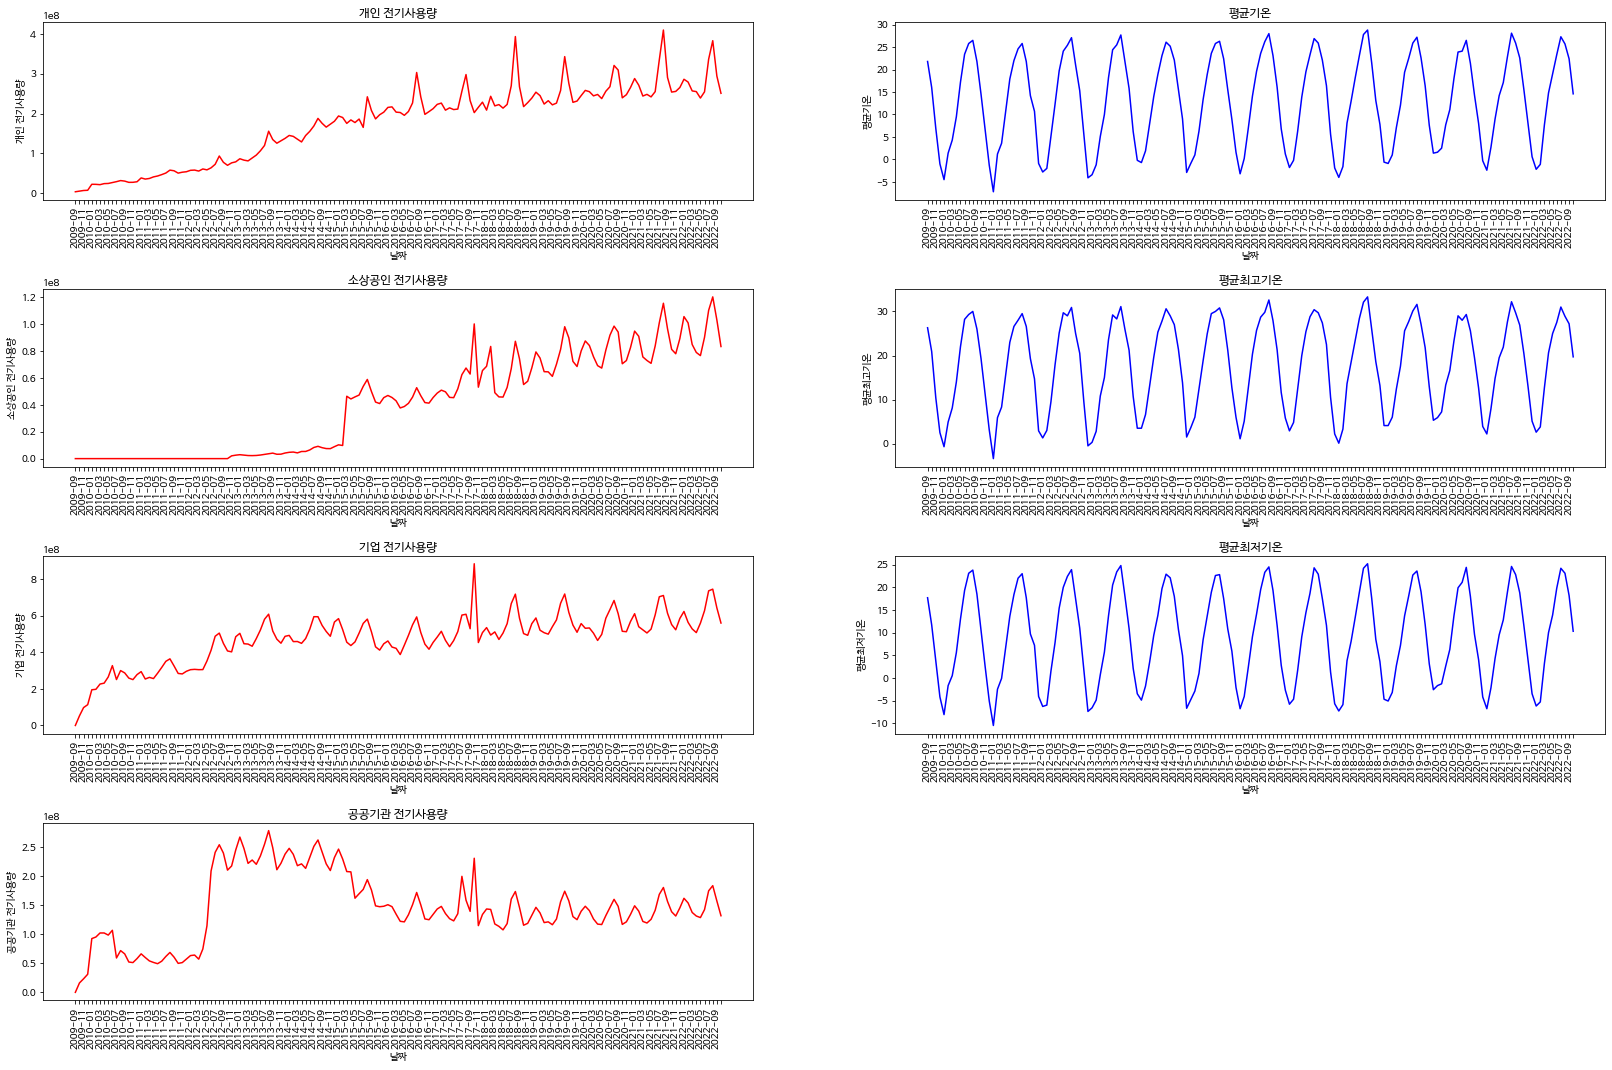

In [30]:
plt.figure(figsize = (28, 18))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5) 

temp_elec_features =  ['개인 전기사용량',  '평균기온', '소상공인 전기사용량', '평균최고기온', '기업 전기사용량',  '평균최저기온',  '공공기관 전기사용량']
color = ['r', 'b', 'r', 'b', 'r', 'b', 'r']

import seaborn as sns

for idx, feature in enumerate(temp_elec_features):
  ax = plt.subplot(grid[idx])
  sns.lineplot(data = temp_elec,
               x = '날짜',
               y = feature,
               color = color[idx], 
               ax = ax) 
  ax.set_title(f'{feature}')
  plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 해결
  plt.xticks(rotation = 90)
  for i, tick in enumerate(ax.xaxis.get_ticklabels()):  # x축에 나타나는 날짜의 수가 너무 많아 두 달에 한번 나타나게 하는 반복문
    if i % 2 != 0:
        tick.set_visible(False)

- 전기사용량과 기온 모두 파동형태로 반복되는 시계열 자료를 보이는 것으로 보아 어느정도의 상관관계가 있을 것으로 예측됨.
- 추가적으로, 다른 사용자들과는 다르게 공공기관의 전기사용량에서는 2014년 이후로 감소 추세가 보이는데 이에 대한 이유도 탐색해볼 것.

##### 상관관계 파악

In [31]:
grid = gridspec.GridSpec(2, 2)

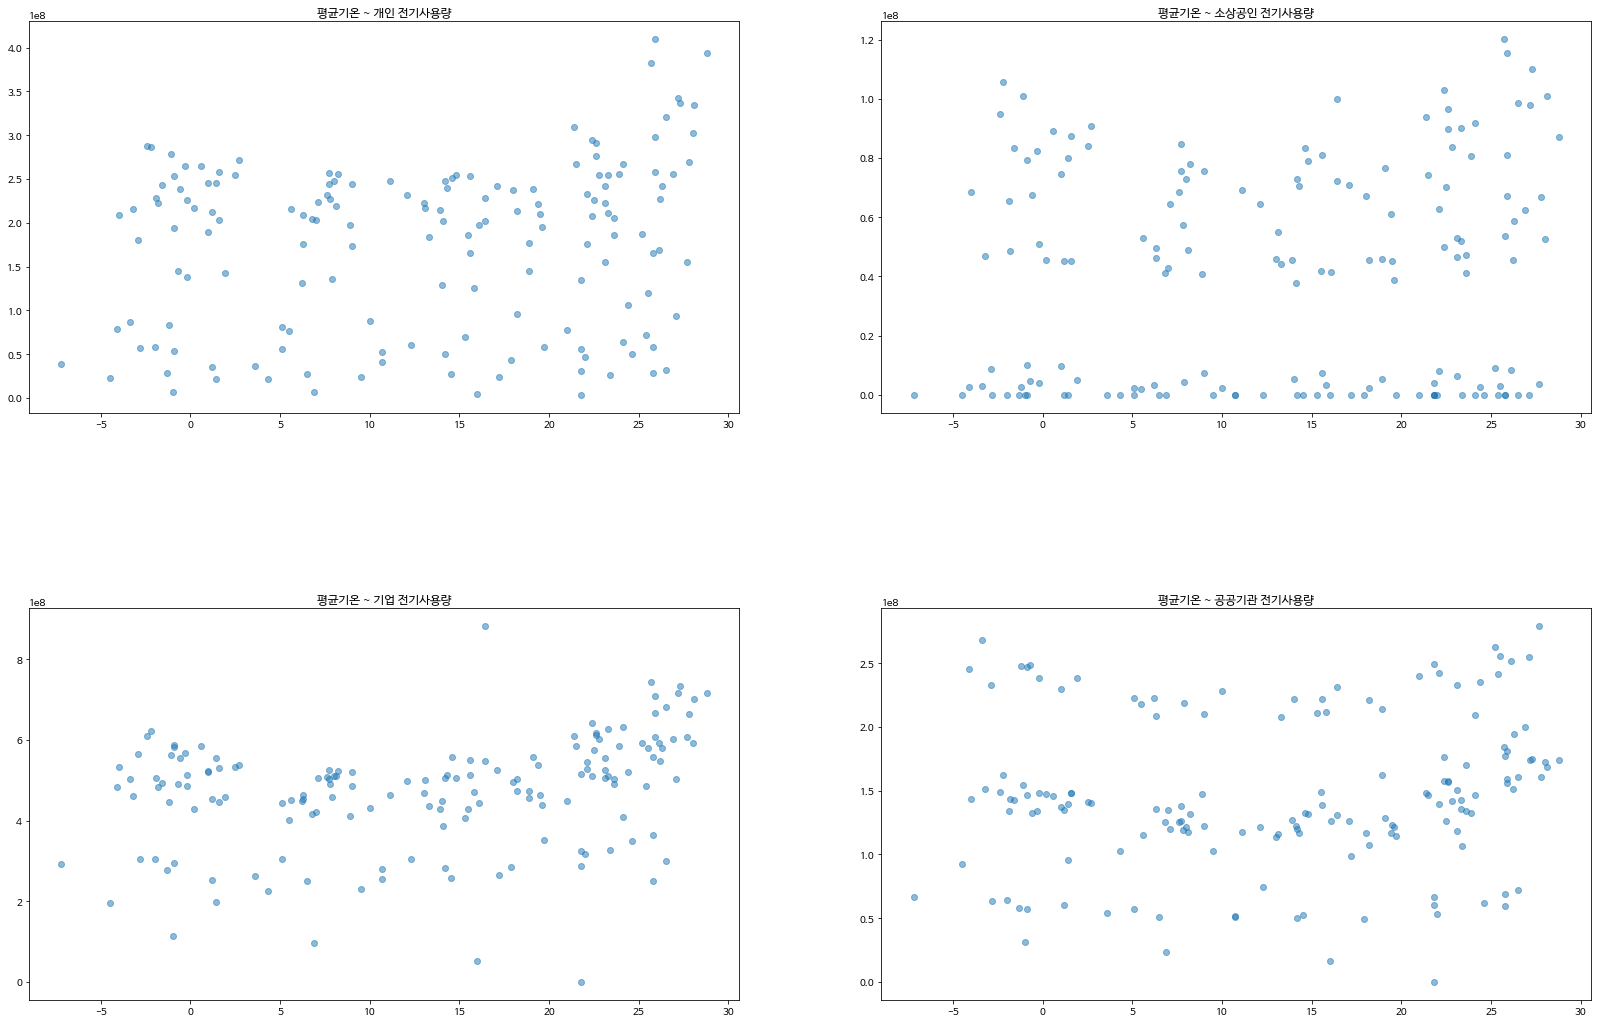

In [32]:
# 산점도를 통한 상관관계 파악
plt.figure(figsize = (28, 18))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5) 

elec_features =  ['개인 전기사용량', '소상공인 전기사용량', '기업 전기사용량',  '공공기관 전기사용량']
color = ['r', 'b', 'r', 'b', 'r', 'b', 'r']

for idx, feature in enumerate(elec_features):
  ax = plt.subplot(grid[idx])
  x = temp_elec['평균기온'].values
  y = temp_elec[feature].values
  plt.scatter(x, y, alpha = 0.5 )
  ax.set_title(f'평균기온 ~ {feature}')

- 산점도에서 약하게 나마 이차함수 형태 꼴을 띠는 것으로보아 어느정도의 상관성은 있을 것이라고 추측됨.

In [33]:
# 상관계수 검정
import numpy as np
import scipy.stats as stats

for feature in elec_features:
  print(feature)
  x = temp_elec['평균기온'].values
  y = temp_elec[feature].values
  print('Covariance:{: .2f}'.format(np.cov(x, y)[0, 1]))
  print('Correlation:{: .2f}'.format(stats.pearsonr(x, y)[0]))   # scipy 패키지의 stats.pearsonr()을 이용하면 상관계수와 p-value를 동시에 얻을 수 있음
  print('P-value:{: .4f}'.format(stats.pearsonr(x, y)[1]))
  print('\n')

개인 전기사용량
Covariance: 172059718.37
Correlation: 0.18
P-value: 0.0262


소상공인 전기사용량
Covariance: 43243073.31
Correlation: 0.12
P-value: 0.1492


기업 전기사용량
Covariance: 409672419.72
Correlation: 0.29
P-value: 0.0002


공공기관 전기사용량
Covariance: 73363778.90
Correlation: 0.12
P-value: 0.1375




- 귀무가설 "상관관계가 없다" 하에서의 검정 결과 개인과 기업에서의 p-value가 각각 0.0262, 0.0002라는 값이 나왔으므로 유의수준 5%에서 귀무가설을 기각할 수 있음을 알 수 있다.
- 특히, 기업의 전기사용량에서의 p-value가 0에 가깝게 나왔으므로 더 강하게 귀무가설을 기각할 수 있다.


#### 공공기관 전기사용량 감축이유
-  저탄소 녹색성장 기본법 제42조(기후변화대응 및 에너지의 목표관리)
및 동법 시행령 제28조
- 공공부문 온실가스․에너지 목표관리 운영 등에 관한 지침(환경부고시 제2012-22호)
 ※‘15년까지 온실가스 배출량을 기준배출량(‘07-’09년 배출량 3년평균) 대비 20% 의무감축
- 에너지이용합리화법 제8조(국가․지방자치단체 등의 에너지이용 효율화 조치 등) 및 동법 시행령 제15조
- 공공기관 에너지이용합리화 추진에 관한 규정(지식경제부고시 제2012-18호)
 ※ 난방설비 가동시 평균 18℃이하, 냉방설비 가동시 평균 28℃이상 유지 

  #### [분석2]  가스사용량과 평균기온은 연관이 있을 것이다.

- 가스사용량과 기온만을 나타낸 데이터프레임 생성

In [34]:
energy_gas = pd.DataFrame([energy_individual['현년 가스사용량'], energy_sbuis['현년 가스사용량'], energy_enterprise['현년 가스사용량'], energy_public['현년 가스사용량']], 
             index = ['개인 가스사용량', '소상공인 가스사용량', '기업 가스사용량', '공공기관 가스사용량'] ).transpose().fillna(0)
energy_gas  # 개인, 소상공인, 기업, 공공기관의 가스사용량으로 새로운 데이터프레임 생성

,개인 가스사용량,소상공인 가스사용량,기업 가스사용량,공공기관 가스사용량
날짜,,,,
2009-09,476425.0,0.0,13.0,0.0
2009-10,956426.0,0.0,2749303.0,298824.0
2009-11,2405251.0,0.0,4595055.0,552722.0
2009-12,4754366.0,0.0,7343295.0,1300191.0
2010-01,7892660.0,0.0,12104322.0,5896001.0
...,...,...,...,...
2022-06,15468022.0,2016862.0,21097892.0,2245855.0
2022-07,10701998.0,1938444.0,20411256.0,2782061.0
2022-08,8718677.0,1976612.0,26544448.0,3125727.0


In [35]:
weather_temp = weather_final[['평균기온', '평균최고기온', '평균최저기온']]
weather_temp

,평균기온,평균최고기온,평균최저기온
날짜,,,
2009-09,21.8,26.3,17.7
2009-10,16.0,20.9,11.7
2009-11,6.9,10.4,3.7
2009-12,-1.0,2.5,-4.2
2010-01,-4.5,-0.7,-8.1
...,...,...,...
2022-06,23.3,27.5,19.8
2022-07,27.3,31.0,24.2
2022-08,25.7,28.9,23.1


In [36]:
temp_gas = pd.merge(weather_temp, energy_gas, left_index = True, right_index = True) # 날짜 인덱스를 기준으로 두 데이터프레임을 병합
temp_gas

,평균기온,평균최고기온,평균최저기온,개인 가스사용량,소상공인 가스사용량,기업 가스사용량,공공기관 가스사용량
날짜,,,,,,,
2009-09,21.8,26.3,17.7,476425.0,0.0,13.0,0.0
2009-10,16.0,20.9,11.7,956426.0,0.0,2749303.0,298824.0
2009-11,6.9,10.4,3.7,2405251.0,0.0,4595055.0,552722.0
2009-12,-1.0,2.5,-4.2,4754366.0,0.0,7343295.0,1300191.0
2010-01,-4.5,-0.7,-8.1,7892660.0,0.0,12104322.0,5896001.0
...,...,...,...,...,...,...,...
2022-06,23.3,27.5,19.8,15468022.0,2016862.0,21097892.0,2245855.0
2022-07,27.3,31.0,24.2,10701998.0,1938444.0,20411256.0,2782061.0
2022-08,25.7,28.9,23.1,8718677.0,1976612.0,26544448.0,3125727.0


##### 시각화

In [37]:
grid = gridspec.GridSpec(4, 2)

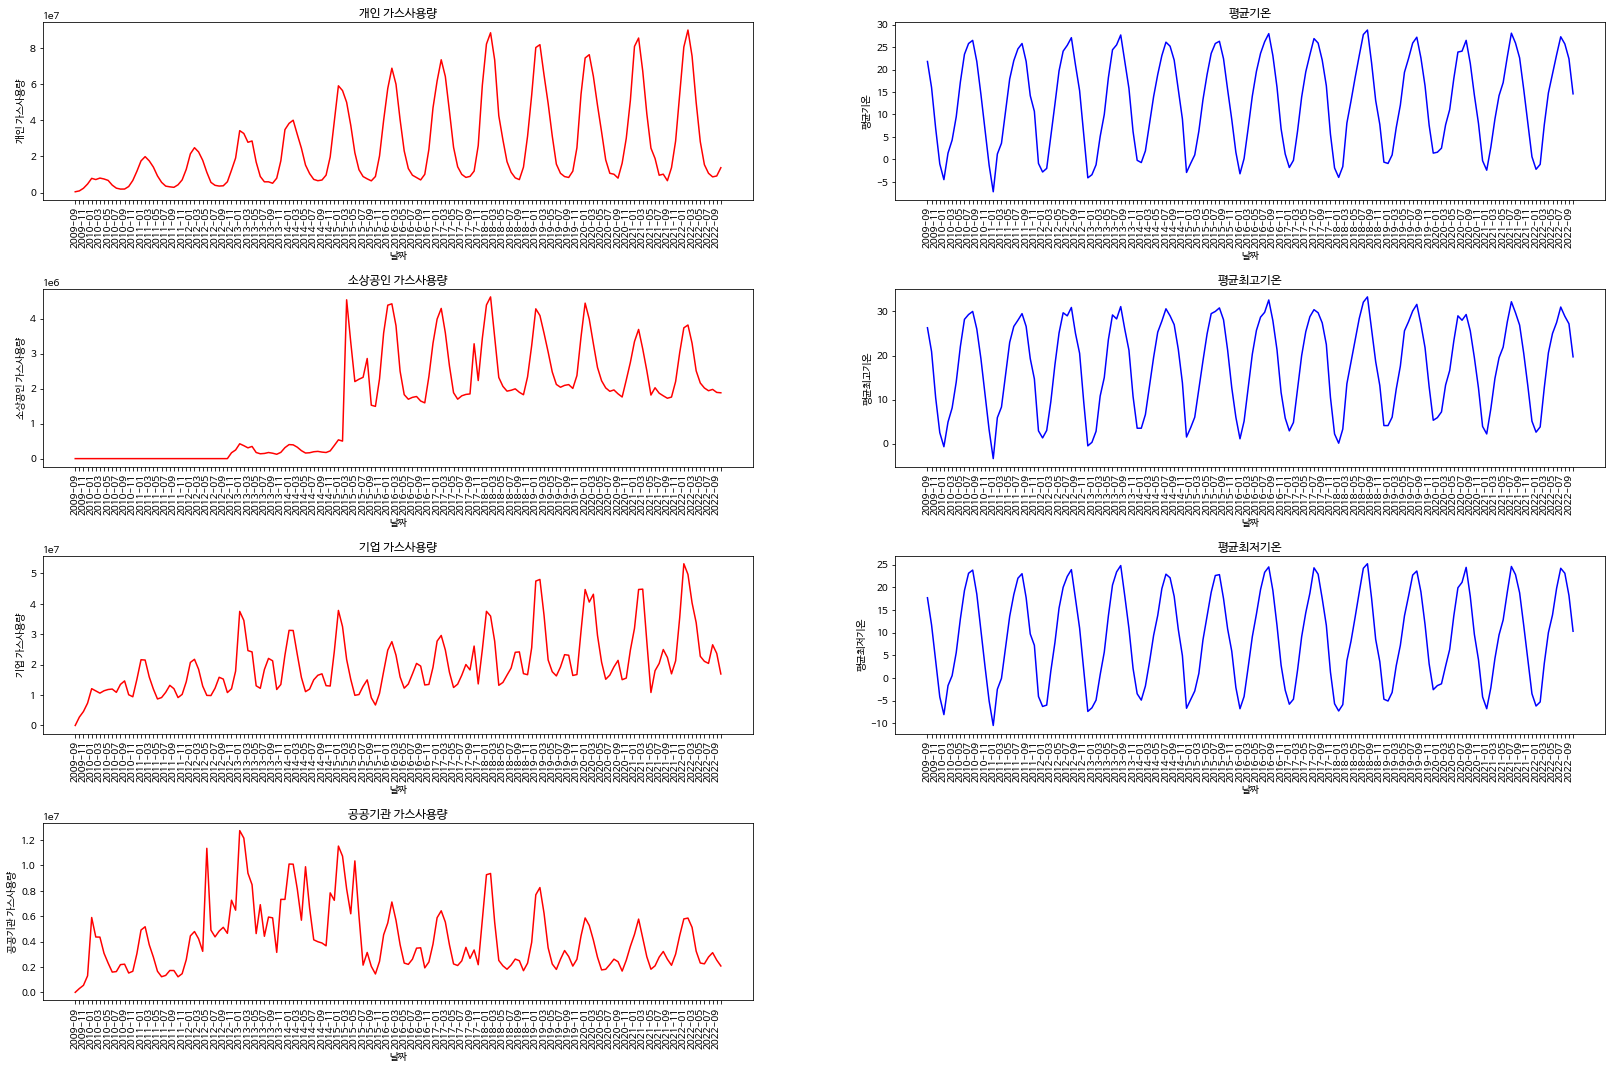

In [38]:
plt.figure(figsize = (28, 18))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5) 

temp_gas_features =  ['개인 가스사용량',  '평균기온', '소상공인 가스사용량', '평균최고기온', '기업 가스사용량',  '평균최저기온',  '공공기관 가스사용량']
color = ['r', 'b', 'r', 'b', 'r', 'b', 'r']

for idx, feature in enumerate(temp_gas_features):
  ax = plt.subplot(grid[idx])
  sns.lineplot(data = temp_gas,
               x = '날짜',
               y = feature,
               color = color[idx], 
               ax = ax) 
  ax.set_title(f'{feature}')
  plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 해결
  plt.xticks(rotation = 90)
  for i, tick in enumerate(ax.xaxis.get_ticklabels()):  # x축에 나타나는 날짜의 수가 너무 많아 두 달에 한번 나타나게 하는 반복문
    if i % 2 != 0:
        tick.set_visible(False)

- 앞서와 마찬가지로 가스사용량과 기온 모두 파동형태로 반복되는 시계열 자료를 보이는 것으로 보아 어느정도의 상관관계가 있을 것으로 예측됨.
- 추가적으로, 다른 사용자들과는 다르게 공공기관의 전기사용량에서는 2014년 이후로 감소 추세가 보이는데 앞에서와 같은 이유로 귀결됨.

##### 상관관계 

In [39]:
grid = gridspec.GridSpec(2, 2)

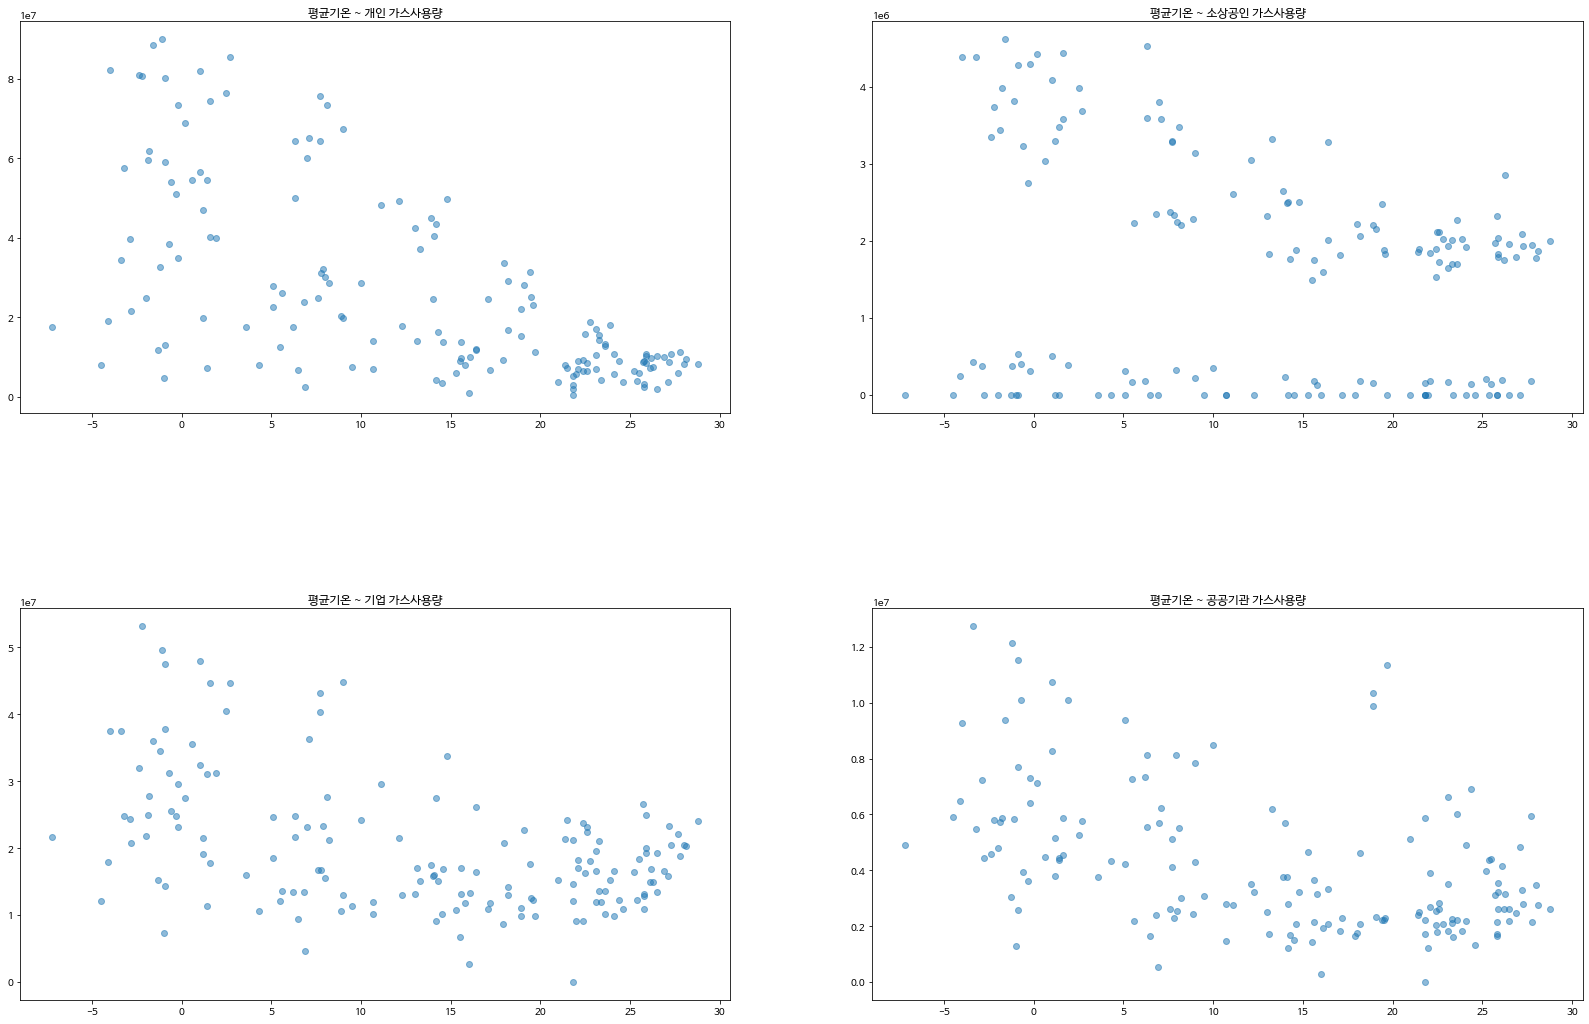

In [40]:
# 산점도를 통한 상관관계 파악
plt.figure(figsize = (28, 18))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5) 

gas_features =  ['개인 가스사용량', '소상공인 가스사용량', '기업 가스사용량',  '공공기관 가스사용량']

for idx, feature in enumerate(gas_features):
  ax = plt.subplot(grid[idx])
  x = temp_gas['평균기온'].values
  y = temp_gas[feature].values
  plt.scatter(x, y, alpha = 0.5 )
  ax.set_title(f'평균기온 ~ {feature}')

- 기온이 오를수록 가스사용량이 전반적으로 작아지는 것으로 보아 음의 상관관계가 존재할 것으로 예상됨.

In [41]:
# 상관계수 검정
for feature in gas_features:
  print(feature)
  x = temp_gas['평균기온'].values
  y = temp_gas[feature].values
  print('Covariance:{: .2f}'.format(np.cov(x, y)[0, 1]))
  print('Correlation:{: .2f}'.format(stats.pearsonr(x, y)[0]))   # scipy 패키지의 stats.pearsonr()을 이용하면 상관계수와 p-value를 동시에 얻을 수 있음
  print('P-value:{: .4f}'.format(stats.pearsonr(x, y)[1]))
  print('\n')

개인 가스사용량
Covariance:-157002408.12
Correlation:-0.65
P-value: 0.0000


소상공인 가스사용량
Covariance:-3260202.23
Correlation:-0.23
P-value: 0.0045


기업 가스사용량
Covariance:-46115738.79
Correlation:-0.45
P-value: 0.0000


공공기관 가스사용량
Covariance:-12732432.05
Correlation:-0.48
P-value: 0.0000




- 귀무가설 "상관관계가 없다"하에서 검정 결과 p-value가 0에 아주 매우 가까운 값이 나왔으므로 귀무가설을 기각할 수 있음을 알 수 있다.
- 즉, 가스사용량과 온도는 음의 상관관계가 존재한다고 말할 수 있음.

  #### [분석3]  전기사용량과 습도는 연관이 있을 것이다.

- 전기사용량과 습도만을 컬럼으로 가지는 데이터프레임 생성

In [42]:
energy_elec # 앞에서 사용했던 데이터프레임

,개인 전기사용량,소상공인 전기사용량,기업 전기사용량,공공기관 전기사용량
날짜,,,,
2009-09,3408312.0,0.0,259.0,0.0
2009-10,4976029.0,0.0,52667514.0,16216821.0
2009-11,6596224.0,0.0,97680060.0,23374442.0
2009-12,7136646.0,0.0,113456039.0,31177917.0
2010-01,22227560.0,0.0,194858935.0,92705086.0
...,...,...,...,...
2022-06,254486733.0,90157061.0,626529234.0,142726020.0
2022-07,336383318.0,110155572.0,734695297.0,175099486.0
2022-08,382965547.0,120183240.0,743931782.0,184005957.0


In [43]:
weather_humid = weather_final['평균상대습도'].to_frame() # 습도에 대한 속성이 한개의 컬럼만 존재하여 시리즈로 추출되므로 데이터프레임으로 변환
weather_humid 

,평균상대습도
날짜,
2009-09,64
2009-10,62
2009-11,64
2009-12,60
2010-01,65
...,...
2022-06,73
2022-07,77
2022-08,80


In [44]:
humid_elec = pd.merge(weather_humid, energy_elec, left_index = True, right_index = True) # 날짜 인덱스를 기준으로 두 데이터프레임을 병합
humid_elec

,평균상대습도,개인 전기사용량,소상공인 전기사용량,기업 전기사용량,공공기관 전기사용량
날짜,,,,,
2009-09,64,3408312.0,0.0,259.0,0.0
2009-10,62,4976029.0,0.0,52667514.0,16216821.0
2009-11,64,6596224.0,0.0,97680060.0,23374442.0
2009-12,60,7136646.0,0.0,113456039.0,31177917.0
2010-01,65,22227560.0,0.0,194858935.0,92705086.0
...,...,...,...,...,...
2022-06,73,254486733.0,90157061.0,626529234.0,142726020.0
2022-07,77,336383318.0,110155572.0,734695297.0,175099486.0
2022-08,80,382965547.0,120183240.0,743931782.0,184005957.0


##### 시각화

In [45]:
grid = gridspec.GridSpec(3, 2)

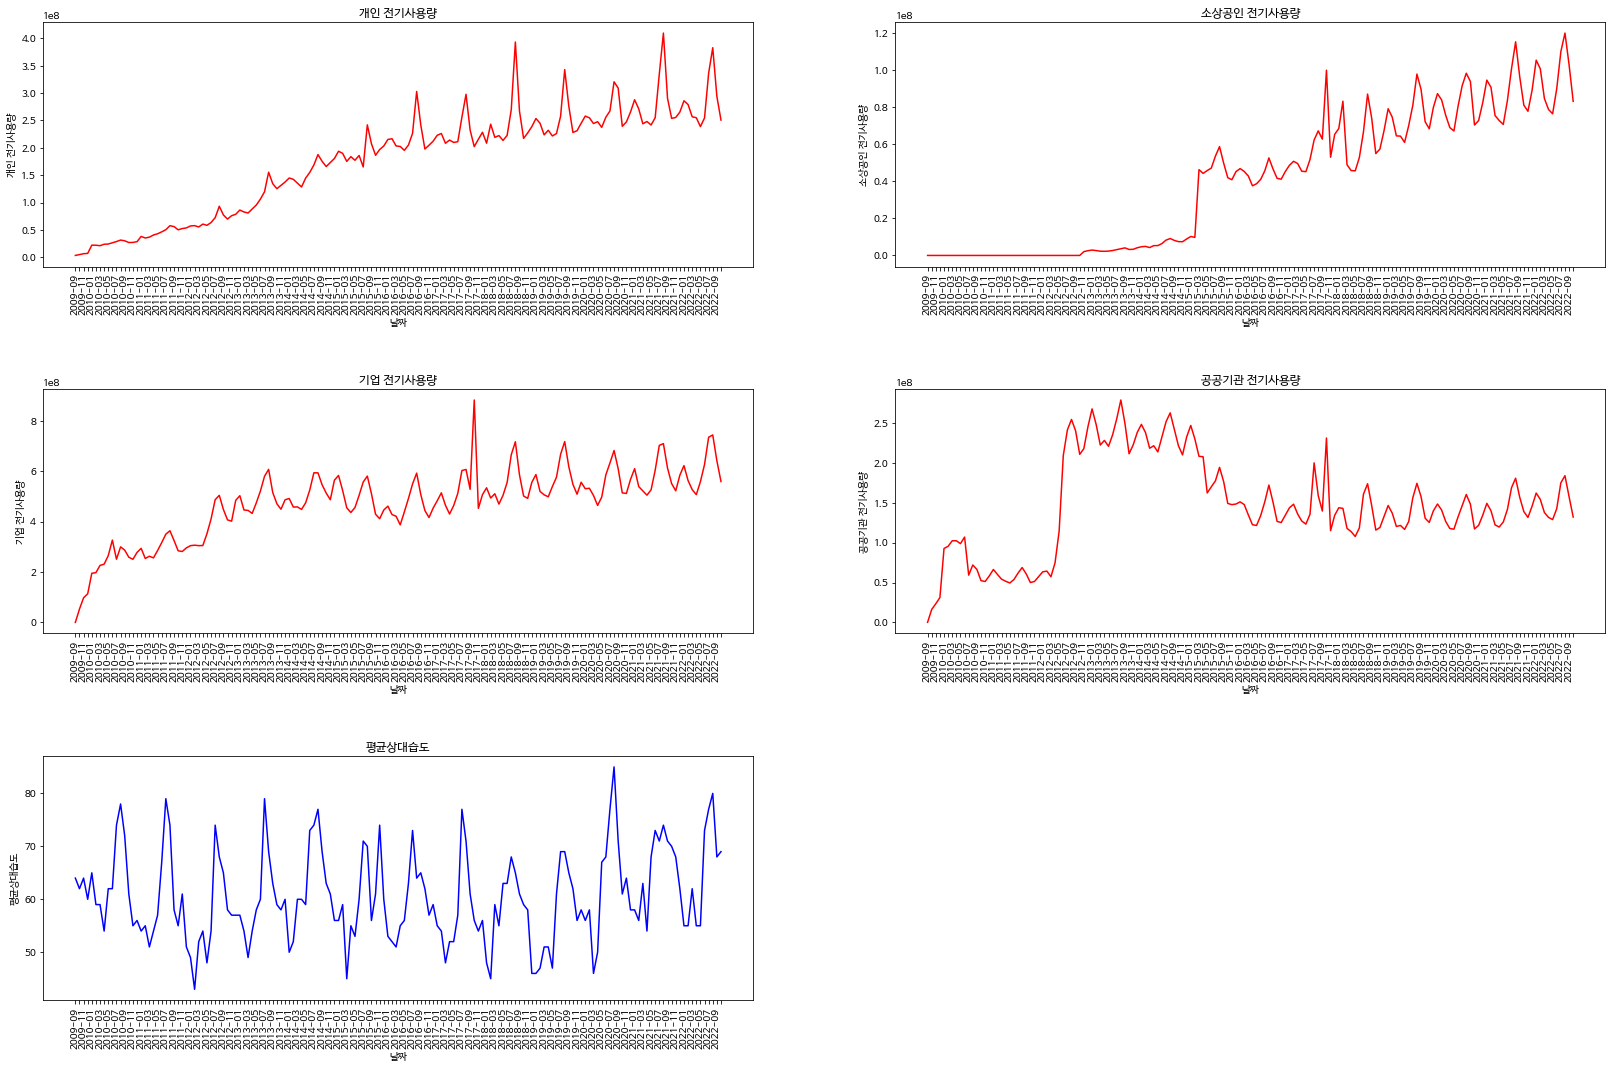

In [46]:
plt.figure(figsize = (28, 18))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5) 

humid_elec_features =  ['개인 전기사용량', '소상공인 전기사용량', '기업 전기사용량', '공공기관 전기사용량', '평균상대습도']
color = ['r', 'r', 'r', 'r', 'b']

for idx, feature in enumerate(humid_elec_features):
  ax = plt.subplot(grid[idx])
  sns.lineplot(data = humid_elec,
               x = '날짜',
               y = feature,
               color = color[idx], 
               ax = ax) 
  ax.set_title(f'{feature}')
  plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 해결
  plt.xticks(rotation = 90)
  for i, tick in enumerate(ax.xaxis.get_ticklabels()):  # x축에 나타나는 날짜의 수가 너무 많아 두 달에 한번 나타나게 하는 반복문
    if i % 2 != 0:
        tick.set_visible(False)

- 상대습도와 가스사용량의 시계열 자료가 어느 정도 비슷한 파동형태를 지니고 있으므로 연관성이 있을 수도 있겠다는 추측.

##### 상관관계 분석

In [47]:
grid = gridspec.GridSpec(2, 2)

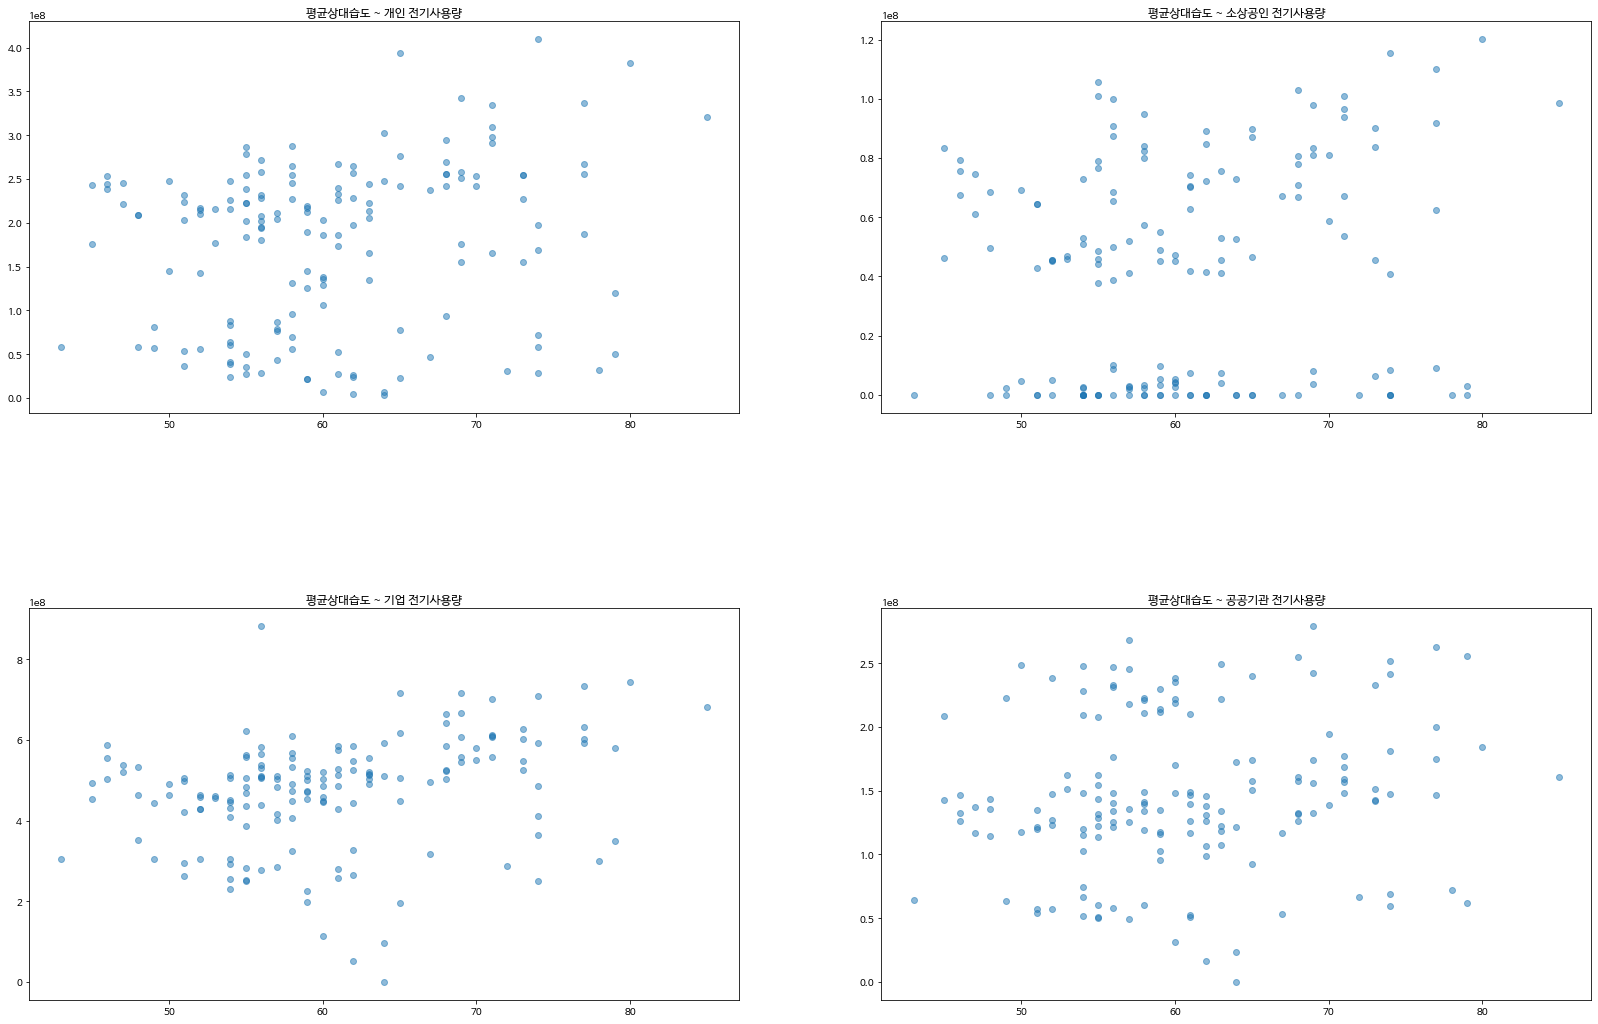

In [48]:
# 산점도를 통한 상관관계 파악
plt.figure(figsize = (28, 18))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5) 

elec_features =  ['개인 전기사용량', '소상공인 전기사용량', '기업 전기사용량', '공공기관 전기사용량']

for idx, feature in enumerate(elec_features):
  ax = plt.subplot(grid[idx])
  x = humid_elec['평균상대습도'].values
  y = humid_elec[feature].values
  plt.scatter(x, y, alpha = 0.5 )
  ax.set_title(f'평균상대습도 ~ {feature}')

- 앞의 시계열자료에서와는 다르게 실제 산점도에서는 그다지 큰 연관관계가 보이지 않음.

In [49]:
# 상관계수 검정
for feature in elec_features:
  print(feature)
  x = humid_elec['평균상대습도'].values
  y = humid_elec[feature].values
  print('Covariance:{: .2f}'.format(np.cov(x, y)[0, 1]))
  print('Correlation:{: .2f}'.format(stats.pearsonr(x, y)[0]))   # scipy 패키지의 stats.pearsonr()을 이용하면 상관계수와 p-value를 동시에 얻을 수 있음
  print('P-value:{: .4f}'.format(stats.pearsonr(x, y)[1]))
  print('\n')

개인 전기사용량
Covariance: 146831802.33
Correlation: 0.18
P-value: 0.0226


소상공인 전기사용량
Covariance: 44360583.96
Correlation: 0.14
P-value: 0.0749


기업 전기사용량
Covariance: 329324695.82
Correlation: 0.28
P-value: 0.0004


공공기관 전기사용량
Covariance: 72508559.07
Correlation: 0.14
P-value: 0.0773




- 귀무가설 "상관관계가 없다"에 대한 검정 결과 기업의 전기사용량을 제외한 나머지 전기사용량과의 연관성이 크지 않은 것으로 보임.

  #### [분석4]  수도사용량과 습도는 연관이 있을 것이다.

- 수도사용량과 습도 속성만 존재하는 데이터프레임 생성

In [52]:
energy_water = pd.DataFrame([energy_individual['현년 수도사용량'], energy_sbuis['현년 수도사용량'], energy_enterprise['현년 수도사용량'], energy_public['현년 수도사용량']], 
             index = ['개인 수도사용량', '소상공인 수도사용량', '기업 수도사용량', '공공기관 수도사용량'] ).transpose().fillna(0)
energy_water  # 개인, 소상공인, 기업, 공공기관의 수도사용량으로 새로운 데이터프레임 생성

,개인 수도사용량,소상공인 수도사용량,기업 수도사용량,공공기관 수도사용량
날짜,,,,
2009-09,4.221577e+05,0.0,38.200,0.000
2009-10,6.076711e+05,0.0,1009451.200,335667.400
2009-11,7.079629e+05,0.0,1190754.400,311147.000
2009-12,7.332474e+05,0.0,1303678.450,359700.083
2010-01,1.867839e+06,0.0,4486533.663,470467.400
...,...,...,...,...
2022-06,1.508746e+07,1557061.0,4543702.200,815298.200
2022-07,1.490720e+07,1485475.4,4704445.200,1262978.200
2022-08,1.555593e+07,1695680.6,5332561.200,998662.200


In [51]:
weather_humid

,평균상대습도
날짜,
2009-09,64
2009-10,62
2009-11,64
2009-12,60
2010-01,65
...,...
2022-06,73
2022-07,77
2022-08,80


In [53]:
humid_water = pd.merge(weather_humid, energy_water, left_index = True, right_index = True)
humid_water

,평균상대습도,개인 수도사용량,소상공인 수도사용량,기업 수도사용량,공공기관 수도사용량
날짜,,,,,
2009-09,64,4.221577e+05,0.0,38.200,0.000
2009-10,62,6.076711e+05,0.0,1009451.200,335667.400
2009-11,64,7.079629e+05,0.0,1190754.400,311147.000
2009-12,60,7.332474e+05,0.0,1303678.450,359700.083
2010-01,65,1.867839e+06,0.0,4486533.663,470467.400
...,...,...,...,...,...
2022-06,73,1.508746e+07,1557061.0,4543702.200,815298.200
2022-07,77,1.490720e+07,1485475.4,4704445.200,1262978.200
2022-08,80,1.555593e+07,1695680.6,5332561.200,998662.200


##### 시각화

In [56]:
grid = gridspec.GridSpec(3, 2)

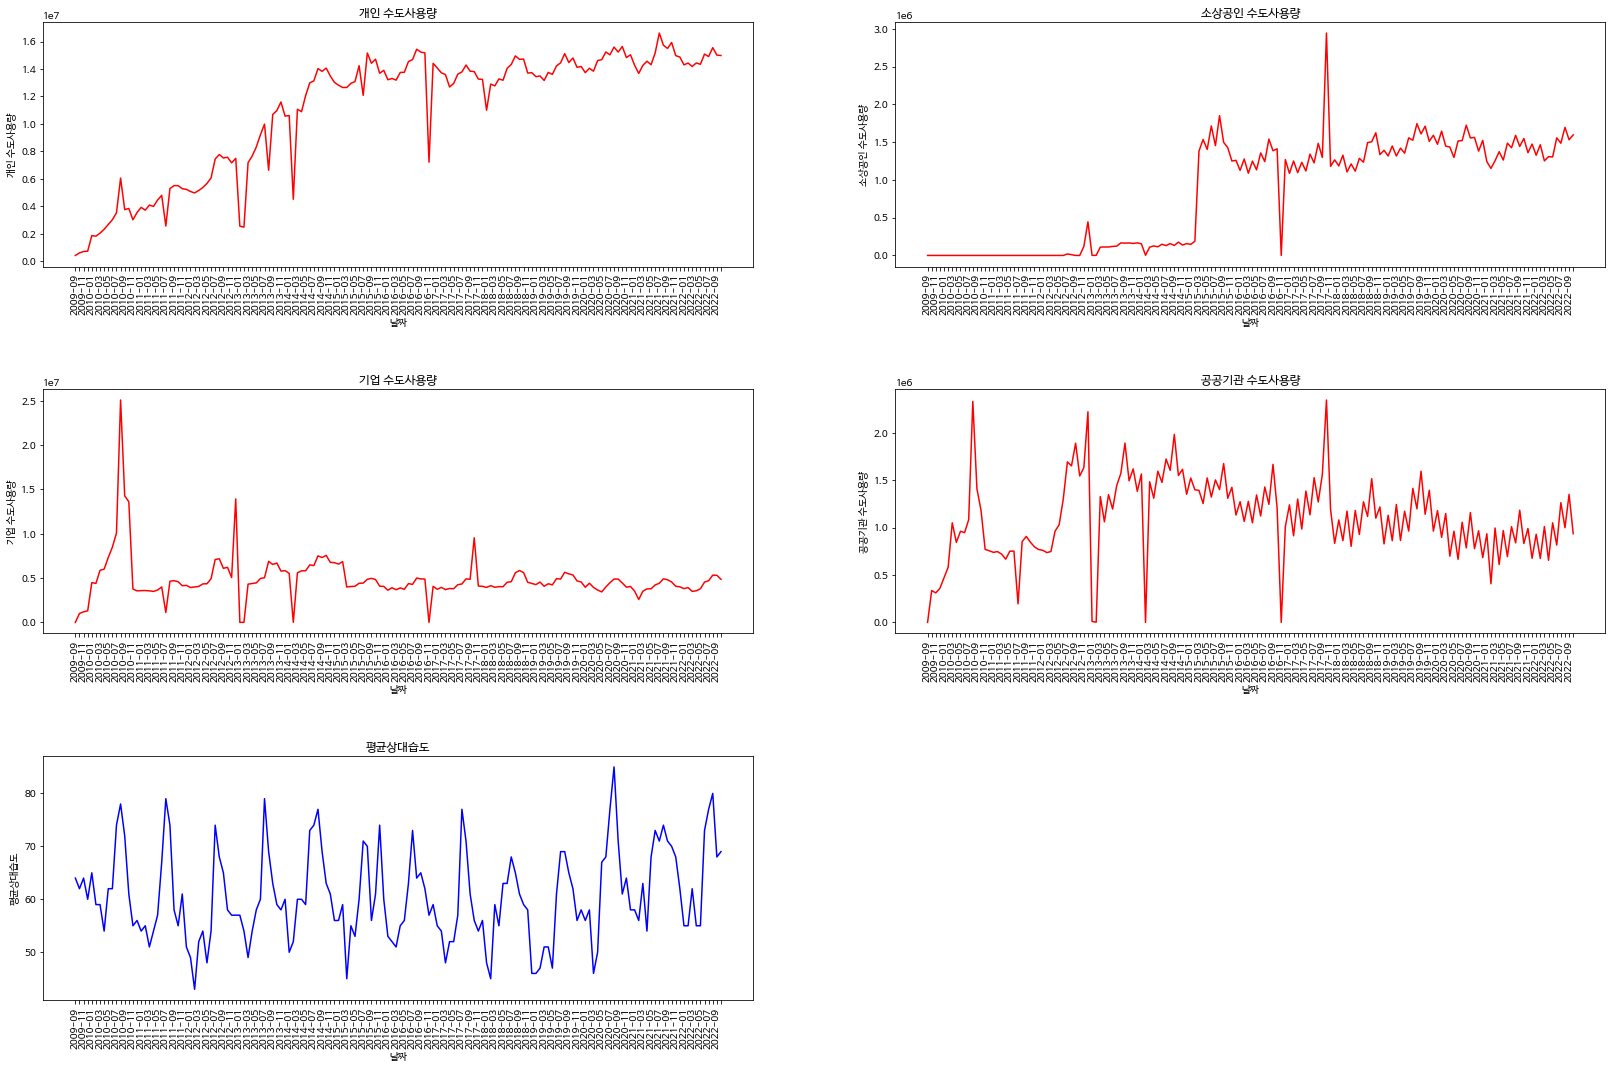

In [57]:
plt.figure(figsize = (28, 18))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5) 

humid_water_features =  ['개인 수도사용량', '소상공인 수도사용량', '기업 수도사용량', '공공기관 수도사용량', '평균상대습도']
color = ['r', 'r', 'r', 'r', 'b']

for idx, feature in enumerate(humid_water_features):
  ax = plt.subplot(grid[idx])
  sns.lineplot(data = humid_water,
               x = '날짜',
               y = feature,
               color = color[idx], 
               ax = ax) 
  ax.set_title(f'{feature}')
  plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 해결
  plt.xticks(rotation = 90)
  for i, tick in enumerate(ax.xaxis.get_ticklabels()):  # x축에 나타나는 날짜의 수가 너무 많아 두 달에 한번 나타나게 하는 반복문
    if i % 2 != 0:
        tick.set_visible(False)

- 두 특성의 상관성이 정확히 보이지 않음.

##### 상관계수 파악

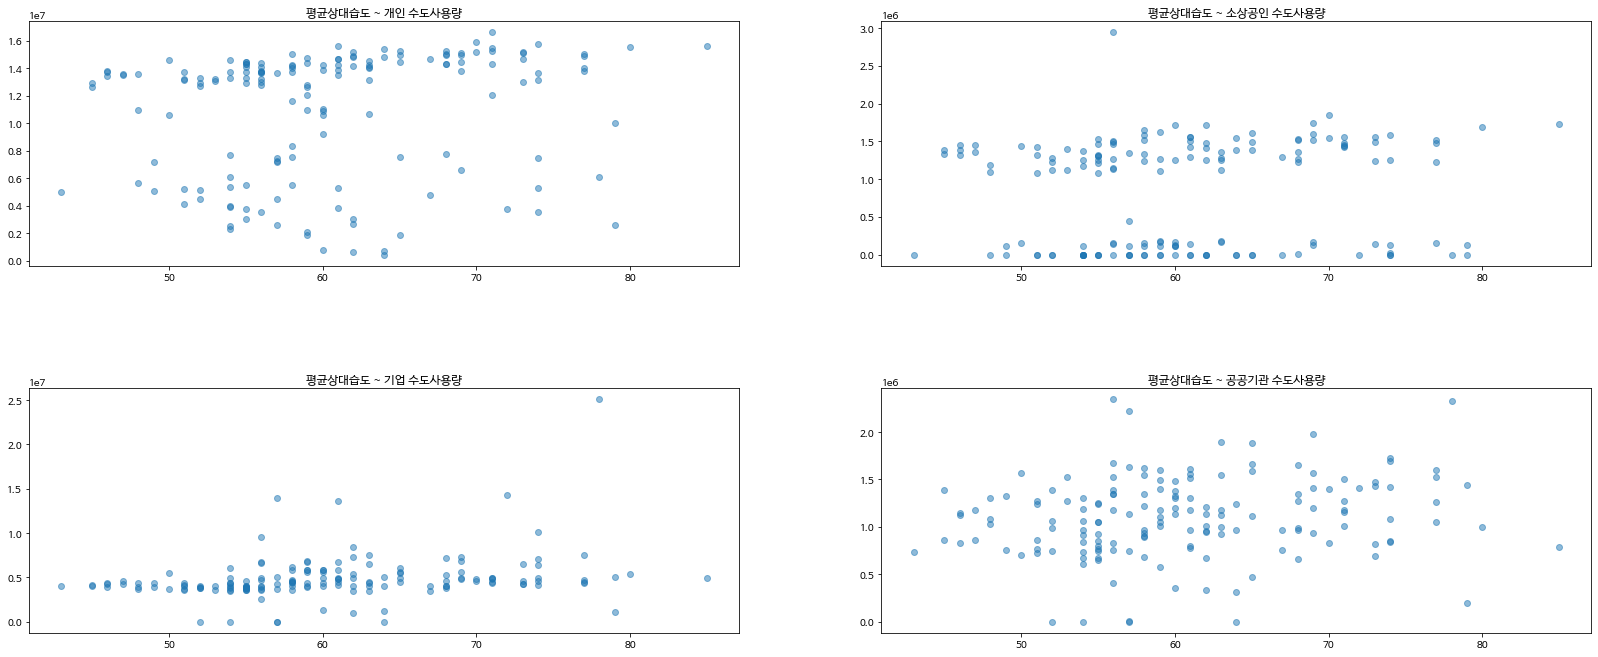

In [58]:
# 산점도를 통한 상관관계 파악
plt.figure(figsize = (28, 18))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5) 

water_features =  ['개인 수도사용량', '소상공인 수도사용량', '기업 수도사용량', '공공기관 수도사용량']

for idx, feature in enumerate(water_features):
  ax = plt.subplot(grid[idx])
  x = humid_water['평균상대습도'].values
  y = humid_water[feature].values
  plt.scatter(x, y, alpha = 0.5 )
  ax.set_title(f'평균상대습도 ~ {feature}')

- 산점도에서도 별다른 특성이 보이지 않음

In [60]:
# 상관계수 검정
for feature in water_features:
  print(feature)
  x = humid_water['평균상대습도'].values
  y = humid_water[feature].values
  print('Covariance:{: .2f}'.format(np.cov(x, y)[0, 1]))
  print('Correlation:{: .2f}'.format(stats.pearsonr(x, y)[0]))   # scipy 패키지의 stats.pearsonr()을 이용하면 상관계수와 p-value를 동시에 얻을 수 있음
  print('P-value:{: .4f}'.format(stats.pearsonr(x, y)[1]))
  print('\n')

개인 수도사용량
Covariance: 5663873.57
Correlation: 0.15
P-value: 0.0687


소상공인 수도사용량
Covariance: 425334.56
Correlation: 0.07
P-value: 0.3711


기업 수도사용량
Covariance: 5965460.59
Correlation: 0.27
P-value: 0.0006


공공기관 수도사용량
Covariance: 640190.44
Correlation: 0.18
P-value: 0.0259




- 귀무가설 "상관관계가 없다"에 대한 검정 결과 기업의 수도사용량을 제외한 나머지 수도사용량과의 연관성이 크지 않은 것으로 보임.

### 결론
1. 앞의 분석 중 가장 유의미한 것은 가스와 평균기온과의 상관관계가 존재한다는 점
2. 또한, 기업의 에너지 사용량은 날씨와 연관이 많다는 점도 알 수 있었음
3. 공공기관 에너지 절감 정책으로 실제 공공기관의 모든 에너지 사용량이 감소추세임.